In [43]:
from pathlib import Path
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline
sns.set_theme()

In [44]:
def load_tensorboard_csv (path) :
    df = pd.read_csv(path, usecols=["Step","Value"])
    filename = Path(path).stem
    df["Model"] = filename
    return df

In [45]:
def merge_tensorboard_df (*args) :
    return pd.concat(args,ignore_index=True)

In [52]:
def generate_plot(df, title):
    ax = sns.lineplot(x="Step", y="Value", hue="Model", data=df)
    ax.set_title(title)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))

In [53]:
def plot_from_directory (path,title) :
    path = Path(path)
    all_csv_paths = path.glob("*.csv")
    loaded_df = [load_tensorboard_csv(x.as_posix()) for x in all_csv_paths]
    merged = merge_tensorboard_df(*loaded_df)
    generate_plot(merged,title)

# Metrics from category datasets (food101, nutrition5k, recipes5k)

## Pre fine tuning convolution base

### Epoch Loss

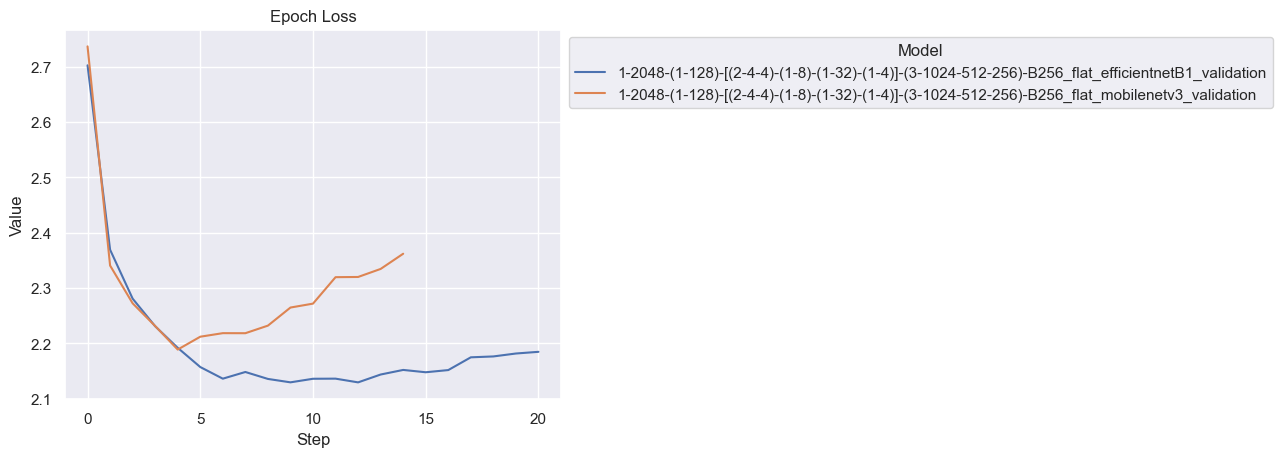

In [54]:
plot_from_directory("./metrics_data/category_ingredients/pre_convolution_finetune/epoch_loss","Epoch Loss")